# Introduction

GitHub: https://github.com/beha9089/DTSA_5509_Final/tree/main

### Motivation
This report contains exploratory data analysis (EDA) and supervised learning models — linear and logistic regression and RandomForest (regressor and classifier) — on a movies dataset obtained from Kaggle, with the goal of predicting movie revenue. While we will look at feature importance in a RandomForest classification model on movie revenue:budget, the focus is prediction, not explanation, of movie revenue. Additionally, it should be noted that the models developed here are not meant to forecast movie revenue, as several features used include information collected after the release of the movie, such as the count of user ratings and a measure of popularity.

### Data
The data used in this report were sourced from Kaggle, and contains a variety of features on 4.8K movies. The data can be found here: https://www.kaggle.com/datasets/utkarshx27/movies-dataset

# Preliminaries

First we will take care of package imports and then read in the data, define a helper df with feature descriptions, and then take some very high-level views of the data.

In [2]:
import pandas as pd
import numpy as np
import math
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.stats.anova import anova_lm
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from datetime import datetime, date, time, timezone

In [3]:
# Read in the data
movies = pd.read_csv('movie_dataset.csv')

In [4]:
# Save the feature descriptions
descriptions = ['The index of the dataframe','The budget of the movie','The genres of the movie','The homepage URL of the movie'
,'The unique identifier of the movie','The keywords associated with the movie','The original language of the movie'
,'The original title of the movie','A brief overview or summary of the movie','The popularity score of the movie'
,'The production companies involved in making the movie','The countries where the movie was produced','The release date of the movie'
,'The revenue generated by the movie','The duration of the movie in minutes','The languages spoken in the movie','The status of the movie (e.g., Released, Rumored)'
,'The tagline or slogan of the movie','The title of the movie','The average rating given to the movie by users','The number of votes received by the movie'
,'The cast members of the movie','The crew members involved in making the movie','The director of the movie']

movies_dscr = pd.DataFrame({'column': list(movies.columns),
                            'description': descriptions,
                            'type': list(movies.dtypes)})
movies_dscr

,column,description,type
0,index,The index of the dataframe,int64
1,budget,The budget of the movie,int64
2,genres,The genres of the movie,object
3,homepage,The homepage URL of the movie,object
4,id,The unique identifier of the movie,int64
5,keywords,The keywords associated with the movie,object
6,original_language,The original language of the movie,object
7,original_title,The original title of the movie,object
8,overview,A brief overview or summary of the movie,object
9,popularity,The popularity score of the movie,float64


In [5]:
# Get some basic data on each feature
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   index                 4803 non-null   int64  
 1   budget                4803 non-null   int64  
 2   genres                4775 non-null   object 
 3   homepage              1712 non-null   object 
 4   id                    4803 non-null   int64  
 5   keywords              4391 non-null   object 
 6   original_language     4803 non-null   object 
 7   original_title        4803 non-null   object 
 8   overview              4800 non-null   object 
 9   popularity            4803 non-null   float64
 10  production_companies  4803 non-null   object 
 11  production_countries  4803 non-null   object 
 12  release_date          4802 non-null   object 
 13  revenue               4803 non-null   int64  
 14  runtime               4801 non-null   float64
 15  spoken_languages     

In [6]:
# Get a view of the top of the df
movies.head()

,index,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew,director
0,0,237000000,Action Adventure Fantasy Science Fiction,http://www.avatarmovie.com/,19995,culture clash future space war space colony so...,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Sam Worthington Zoe Saldana Sigourney Weaver S...,"[{'name': 'Stephen E. Rivkin', 'gender': 0, 'd...",James Cameron
1,1,300000000,Adventure Fantasy Action,http://disney.go.com/disneypictures/pirates/,285,ocean drug abuse exotic island east india trad...,en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Johnny Depp Orlando Bloom Keira Knightley Stel...,"[{'name': 'Dariusz Wolski', 'gender': 2, 'depa...",Gore Verbinski
2,2,245000000,Action Adventure Crime,http://www.sonypictures.com/movies/spectre/,206647,spy based on novel secret agent sequel mi6,en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,Daniel Craig Christoph Waltz L\u00e9a Seydoux ...,"[{'name': 'Thomas Newman', 'gender': 2, 'depar...",Sam Mendes
3,3,250000000,Action Crime Drama Thriller,http://www.thedarkknightrises.com/,49026,dc comics crime fighter terrorist secret ident...,en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,...,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,Christian Bale Michael Caine Gary Oldman Anne ...,"[{'name': 'Hans Zimmer', 'gender': 2, 'departm...",Christopher Nolan
4,4,260000000,Action Adventure Science Fiction,http://movies.disney.com/john-carter,49529,based on novel mars medallion space travel pri...,en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,...,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,Taylor Kitsch Lynn Collins Samantha Morton Wil...,"[{'name': 'Andrew Stanton', 'gender': 2, 'depa...",Andrew Stanton


Before moving forward with EDA, we will drop a few columns that won't be investigated in the analysis.

In [7]:
drop_cols1 = ['index', 'homepage', 'id', 'overview', 'crew', 'tagline', 'original_title', 'cast']
movies.drop(columns = drop_cols1, inplace = True)

In the high-level summaries below, we note a few interesting details that will be explored more in detail later:

1. Both budget and revenue have minimum values at 0, with the first quartile of revenue being 0. This signals missing data, especially with respect to revenue, as it is unexpected that a movie would have no budget or revenue.

2. The feature popularity has some far outliers - note the difference between the 3rd quartile and the max value.

3. In runtime and vote_count we also see evidence of missing data, as the min value of 0 indicates. Additionally, in vote_count we again see large outliers.

4. The feature vote_average ranges from 0 to 10, which follows intuition for a rating feature. Here a 0 average does not necessarily indicate missing data.

5. The strongest correlation is between revenue and vote_count, followed by popularity and vote_count. The third largest is revenue and budget. It seems likely that vote_count and popularity are tied in some way, such as both being measures of user interest.

In [8]:
# Summary statistics of numeric features
movies.describe()

,budget,popularity,revenue,runtime,vote_average,vote_count
count,4.803000e+03,4803.000000,4.803000e+03,4801.000000,4803.000000,4803.000000
mean,2.904504e+07,21.492301,8.226064e+07,106.875859,6.092172,690.217989
std,4.072239e+07,31.816650,1.628571e+08,22.611935,1.194612,1234.585891
min,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,7.900000e+05,4.668070,0.000000e+00,94.000000,5.600000,54.000000
50%,1.500000e+07,12.921594,1.917000e+07,103.000000,6.200000,235.000000
75%,4.000000e+07,28.313505,9.291719e+07,118.000000,6.800000,737.000000
max,3.800000e+08,875.581305,2.787965e+09,338.000000,10.000000,13752.000000


In [9]:
# Get the pairwise correlation between the numeric features
movies.corr()

,budget,popularity,revenue,runtime,vote_average,vote_count
budget,1.000000,0.505414,0.730823,0.269851,0.093146,0.593180
popularity,0.505414,1.000000,0.644724,0.225502,0.273952,0.778130
revenue,0.730823,0.644724,1.000000,0.251093,0.197150,0.781487
runtime,0.269851,0.225502,0.251093,1.000000,0.375046,0.271944
vote_average,0.093146,0.273952,0.197150,0.375046,1.000000,0.312997
vote_count,0.593180,0.778130,0.781487,0.271944,0.312997,1.000000


# Data Clean up

Prior to moving on to EDA and feature engineering, we will take a look at missing data and drop records where the data appear to be incomplete or unreliable.

In [10]:
def drop_records(df, indx):
    # Record the number of rows
    records_before_drop = df.shape[0]
    # Drop the selected records
    df.drop(indx, inplace = True)
    # Record the number of rows
    records_after_drop = df.shape[0]
    
    print('Records dropped: {}'.format(len(indx)))
    print('Records before and after drop (delta): {}, {} ({})'.format(records_before_drop, records_after_drop, records_before_drop - records_after_drop))

In [11]:
# Define a list of the summary columns for convenience
summary_cols = ['budget', 'revenue', 'popularity', 'title', 'release_date', 'vote_count']

# Create a dictionary to store all lists of indices to be dropped
dropped_list = {}

#### Drop Records

In [12]:
# Store the indices for the movies in status other than released
dropped_list['not_released'] = movies[movies['status'] != 'Released'].index

# Drop the records
drop_records(movies, dropped_list['not_released'])

Records dropped: 8
Records before and after drop (delta): 4803, 4795 (8)


In [13]:
# Store the indices for the movies with no runtime
dropped_list['no_runtime'] = movies[movies['runtime'] == 0].index

# Drop the records
drop_records(movies, dropped_list['no_runtime'])

Records dropped: 34
Records before and after drop (delta): 4795, 4761 (34)


As the goal in this analysis is to predict revenue, we must deal with the movies without a revenue. We will consider a revenue of 0 to be a data defect and drop the records from our analysis, as no released movie should have a revenue of 0.

In [14]:
no_revenue = sum(movies['revenue'] == 0)
no_budget = sum(movies['budget'] == 0)
no_rev_bud1 = sum((movies['budget'] == 0) & (movies['revenue'] == 0))
no_rev_bud2 = sum((movies['budget'] == 0) | (movies['revenue'] == 0))

print('{} movies are missing revenue\n{} movies are missing budget\n{} movies are missing both revenue and budget\n{} movies are missing budget or revenue'.
     format(no_revenue, no_budget, no_rev_bud1, no_rev_bud2))

1387 movies are missing revenue
1000 movies are missing budget
854 movies are missing both revenue and budget
1533 movies are missing budget or revenue


In [15]:
# Store the indices for the movies with no revenue
dropped_list['no_revenue'] = movies[movies['revenue'] == 0].index

# Drop the records
drop_records(movies, dropped_list['no_revenue'])

Records dropped: 1387
Records before and after drop (delta): 4761, 3374 (1387)


# EDA and Feature Engineering

Before moving on to the modeling stage, we will perform some exploratory analysis of the features and transform some into more useable forms.

Some observations on the numerical features following the preceding clean up

1. There are still seemingly problematic values in budget and revenue. The former still has a min value of 0, and the former a min value of 5. 

2. The three strongest correlations remain the same, though the vote_count:popularity and vote_count:revenue are nearer than before. Additionally, the correlation between budget and revenue decreased.

3. It is clear in the pair plots that there are significant outliers in popularity. These distort the overall shape of the scatterplots quite a bit.

In [16]:
movies.describe()

,budget,popularity,revenue,runtime,vote_average,vote_count
count,3.374000e+03,3374.000000,3.374000e+03,3374.000000,3374.000000,3374.000000
mean,3.890670e+07,28.276700,1.170997e+08,110.415234,6.309632,944.977178
std,4.420836e+07,35.626692,1.835160e+08,21.036619,0.881691,1393.072974
min,0.000000e+00,0.019984,5.000000e+00,41.000000,0.000000,0.000000
25%,8.550000e+06,9.970888,1.537595e+07,96.000000,5.800000,161.000000
50%,2.500000e+07,19.767463,5.182193e+07,106.000000,6.300000,441.000000
75%,5.200000e+07,36.430378,1.401717e+08,121.000000,6.900000,1091.750000
max,3.800000e+08,875.581305,2.787965e+09,338.000000,10.000000,13752.000000


In [17]:
movies.corr()

,budget,popularity,revenue,runtime,vote_average,vote_count
budget,1.000000,0.440178,0.708131,0.232755,-0.029993,0.547489
popularity,0.440178,1.000000,0.605885,0.184104,0.279324,0.752126
revenue,0.708131,0.605885,1.000000,0.233528,0.180062,0.758277
runtime,0.232755,0.184104,0.233528,1.000000,0.368719,0.257819
vote_average,-0.029993,0.279324,0.180062,0.368719,1.000000,0.365406
vote_count,0.547489,0.752126,0.758277,0.257819,0.365406,1.000000


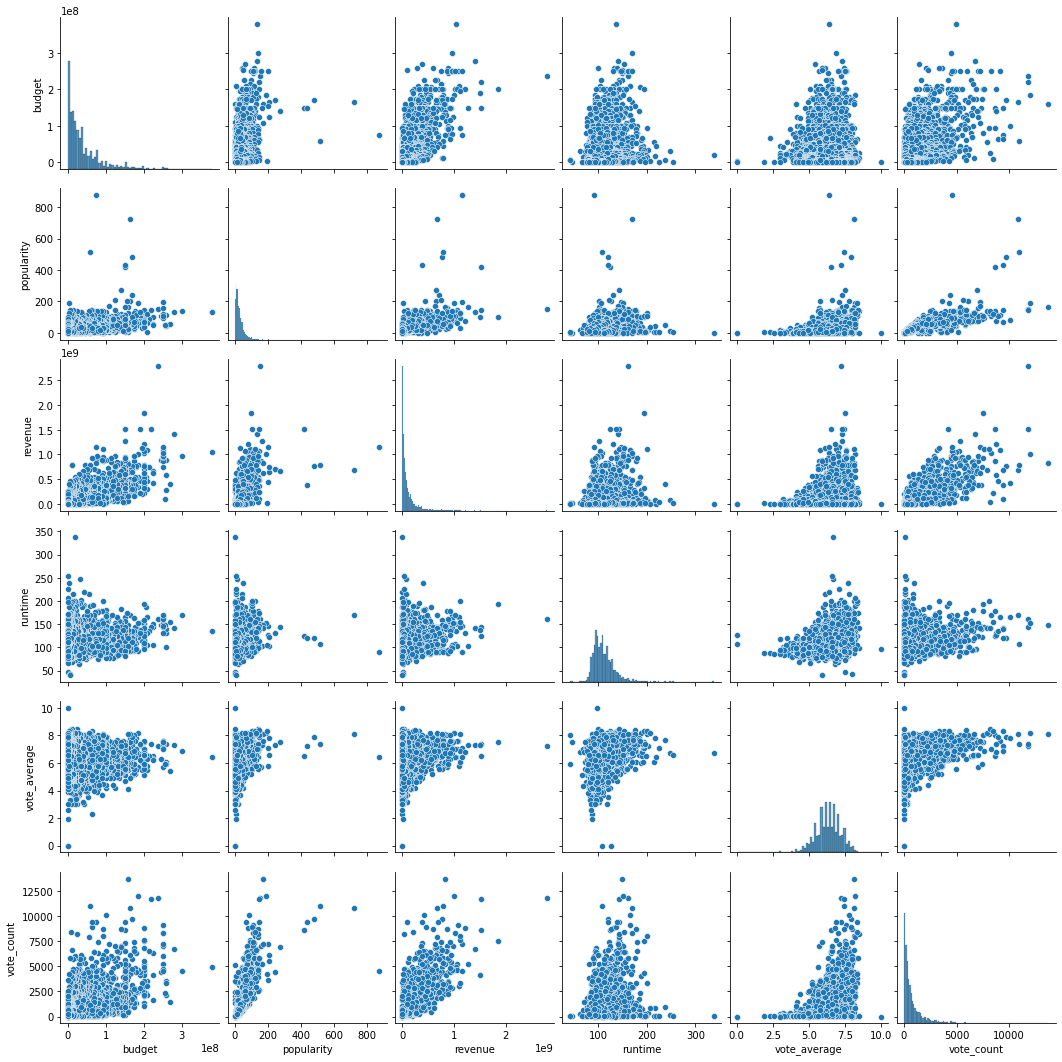

In [18]:
sns.pairplot(movies)

### 'budget' and 'revenue' 

#### revenue:budget ratio

We will first define a feature to directly each movies revenue and budget as a ratio. The ratio will produce some NaN values due to the movies without a budget. We note two extreme outliers, which appear to be due to problematic budgets, that should be excluded from our analysis. 

In [19]:
# Define the revenue to budget ratio
movies['revenue:budget'] = movies['revenue']/movies['budget']
movies['revenue:budget'].replace(np.inf, np.nan, inplace = True)

In [20]:
# Get the distribution of ratios
movies['revenue:budget'].value_counts(bins = 10, sort = False)

(-8500.001, 850000.0]     3226
(850000.0, 1700000.0]        1
(1700000.0, 2550000.0]       0
(2550000.0, 3400000.0]       0
(3400000.0, 4250000.0]       0
(4250000.0, 5100000.0]       0
(5100000.0, 5950000.0]       0
(5950000.0, 6800000.0]       0
(6800000.0, 7650000.0]       0
(7650000.0, 8500000.0]       1
Name: revenue:budget, dtype: int64

In [21]:
# Store the indices of the outlier movies
rev_bud_outlier_indx = movies[(movies['revenue:budget'] >= 850000.0)].index

# Have a look at the outliers
movies[movies.index.isin(rev_bud_outlier_indx)][summary_cols + ['revenue:budget']]

,budget,revenue,popularity,title,release_date,vote_count,revenue:budget
3137,10,10000000,10.013629,Nurse 3-D,2013-09-28,119,1000000.0
4238,1,8500000,28.276480,Modern Times,1936-02-05,856,8500000.0


In [22]:
# Drop the outliers
dropped_list['rev:bud_outlier'] = rev_bud_outlier_indx
drop_records(movies, dropped_list['rev:bud_outlier'])

Records dropped: 2
Records before and after drop (delta): 3374, 3372 (2)


Beyond these two outliers caused by data issues, we see there are three other (lesser) outliers, all of which are popularly known for their low budget and significant success. We will identify further outliers but will stop short of dropping them from the dataset.

Looking closer at the data, we see a large number of movies with revenues beneath their budget (close to 25%). Further, there are 107 movies with revenue less than 10% of the budget. 

In [23]:
# Excluding these outliers does not solve the outlier problem
movies['revenue:budget'].value_counts(bins = 10, sort = False)

(-12.891, 1289.039]       3223
(1289.039, 2578.077]         0
(2578.077, 3867.116]         0
(3867.116, 5156.155]         1
(5156.155, 6445.193]         1
(6445.193, 7734.232]         0
(7734.232, 9023.271]         0
(9023.271, 10312.309]        0
(10312.309, 11601.348]       0
(11601.348, 12890.387]       1
Name: revenue:budget, dtype: int64

In [24]:
# Look at the full outlier group: The three additional are known for being wild successes
movies[movies['revenue:budget'] >= 1300][summary_cols + ['revenue:budget']]

,budget,revenue,popularity,title,release_date,vote_count,revenue:budget
4496,60000,248000000,41.690578,The Blair Witch Project,1999-07-14,1055,4133.333333
4577,15000,193355800,47.456823,Paranormal Activity,2007-09-14,1316,12890.386667
4582,218,1162014,1.063439,Tarnation,2003-10-19,22,5330.339450


In [25]:
# Get summary statistics for the ratio
round(movies['revenue:budget'], 4).describe()

count     3226.000000
mean        12.746787
std        257.169888
min          0.000000
25%          1.023275
50%          2.299700
75%          4.418200
max      12890.386700
Name: revenue:budget, dtype: float64

In [26]:
# Take a closer look at the distribution of movies with a ratio <= 1
movies[movies['revenue:budget'] <= 1]['revenue:budget'].value_counts(bins = 10, sort = False)

(-0.001999, 0.1]    107
(0.1, 0.2]           73
(0.2, 0.3]           82
(0.3, 0.4]           66
(0.4, 0.5]           83
(0.5, 0.6]           74
(0.6, 0.7]           78
(0.7, 0.8]           68
(0.8, 0.9]           90
(0.9, 1.0]           69
Name: revenue:budget, dtype: int64

#### 'revenue'

We can also take a closer look at revenue and see a number of movies with suspiciously low revenue. As with the movies with no revenue we will drop these records for data quality.

In [27]:
movies[movies['revenue'] < 1000][summary_cols + ['revenue:budget']]

,budget,revenue,popularity,title,release_date,vote_count,revenue:budget
1562,30,103,4.590277,Rugrats in Paris: The Movie,2000-09-14,100,3.433333e+00
1655,23000000,12,3.362045,Chasing Liberty,2004-01-09,152,5.217391e-07
1771,28,14,9.670031,The 51st State,2001-12-07,173,5.000000e-01
1912,25,13,4.887940,Angela's Ashes,1999-12-25,59,5.200000e-01
2068,9000000,46,20.410354,Death at a Funeral,2007-02-09,497,5.111111e-06
2485,16000000,12,0.830596,The Cookout,2004-09-03,10,7.500000e-07
2806,0,15,9.572705,Tae Guk Gi: The Brotherhood of War,2004-02-05,133,NaN
2848,0,51,4.480167,My Baby's Daddy,2004-01-09,15,NaN
2874,12000000,23,10.536092,In the Cut,2003-09-09,89,1.916667e-06
2933,11,11,3.375208,F.I.S.T.,1978-04-26,29,1.000000e+00


In [28]:
# Store the indices for the movies with low revenue
dropped_list['low_revenue'] = movies[movies['revenue'] < 1000].index

# Drop the records
drop_records(movies, dropped_list['low_revenue'])

Records dropped: 22
Records before and after drop (delta): 3372, 3350 (22)


### 'popularity'

Here we can take a closer look at the extreme outlier values in popularity. We can see the vast majority of movies have a popularity score below 90 and that there are a small number above 200. These ultra popular movies are quite high revenue but even still distort the relationship between revenue and popularity, based on correlation. 

In [29]:
movies['popularity'].value_counts(bins = 10, sort = False)

(-0.857, 87.576]      3223
(87.576, 175.132]      113
(175.132, 262.688]       7
(262.688, 350.245]       1
(350.245, 437.801]       2
(437.801, 525.357]       2
(525.357, 612.913]       0
(612.913, 700.469]       0
(700.469, 788.025]       1
(788.025, 875.581]       1
Name: popularity, dtype: int64

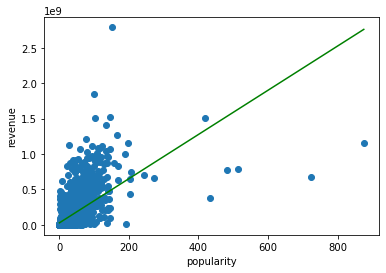

In [30]:
x = movies['popularity']
y = movies['revenue']
plt.scatter(x, y)
plt.xlabel('popularity')
plt.ylabel('revenue')
plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)), color = 'green')
plt.show()

In [31]:
# Store the indices of the outlier movies, based on popularity
pop_outlier_indx = movies[(movies['popularity'] >= 200)].index

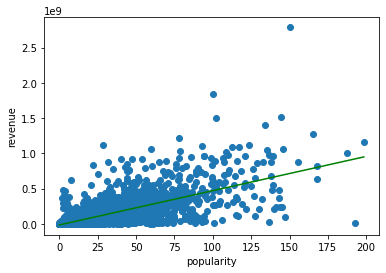

In [32]:
x = movies[~movies.index.isin(pop_outlier_indx)]['popularity']
y = movies[~movies.index.isin(pop_outlier_indx)]['revenue']
plt.scatter(x, y)
plt.xlabel('popularity')
plt.ylabel('revenue')
plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)), color = 'green')
plt.show()

In [33]:
# Check the correlation between popularity and revenue, with and without the outliers
print(movies['popularity'].corr(movies['revenue']))
print(movies[~movies.index.isin(pop_outlier_indx)]['popularity'].corr(movies[~movies.index.isin(pop_outlier_indx)]['revenue']))

0.6049292417479301
0.6801565968124612


In [34]:
# Create an indicator feature for these high popularity movies
movies['extreme_pop'] = (movies.index.isin(pop_outlier_indx)).astype(int)

In [35]:
movies[movies['extreme_pop'] == 1][summary_cols]

,budget,revenue,popularity,title,release_date,vote_count
28,150000000,1513528810,418.708552,Jurassic World,2015-06-09,8662
82,170000000,710644566,243.791743,Dawn of the Planet of the Apes,2014-06-26,4410
88,165000000,652105443,203.734590,Big Hero 6,2014-10-24,6135
94,170000000,773328629,481.098624,Guardians of the Galaxy,2014-07-30,9742
95,165000000,675120017,724.247784,Interstellar,2014-11-05,10867
108,155000000,440603537,202.042635,Terminator Genisys,2015-06-23,3631
127,150000000,378858340,434.278564,Mad Max: Fury Road,2015-05-13,9427
199,140000000,655011224,271.972889,Pirates of the Caribbean: The Curse of the Bla...,2003-07-09,6985
200,125000000,752100229,206.227151,The Hunger Games: Mockingjay - Part 1,2014-11-18,5584
546,74000000,1156730962,875.581305,Minions,2015-06-17,4571


### 'vote_average' and 'vote_count'

As we saw previously, there are many outlier values in vote_count. This aligns with our intuition of the media as a small number of films garner the majority of the attention; if we looked at these outlier films, we would likely recognize each.

However, vote_average does not have this same issue, as by nature of the feature the extremes are averaged out across the votes.

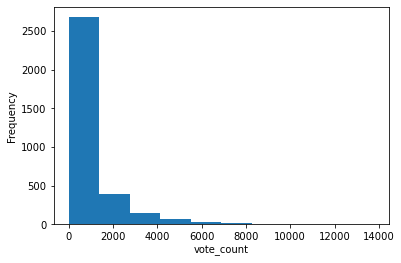

In [36]:
plt.hist(movies['vote_count'])
plt.xlabel('vote_count')
plt.ylabel('Frequency')
plt.show()

In [37]:
movies['vote_count'].value_counts(bins = 10, sort = False)

(-13.753, 1375.2]     2675
(1375.2, 2750.4]       387
(2750.4, 4125.6]       147
(4125.6, 5500.8]        71
(5500.8, 6876.0]        37
(6876.0, 8251.2]        14
(8251.2, 9626.4]        11
(9626.4, 11001.6]        4
(11001.6, 12376.8]       3
(12376.8, 13752.0]       1
Name: vote_count, dtype: int64

In [38]:
movies['vote_average'].value_counts(bins = 10, sort = False)

(-0.011, 1.0]       2
(1.0, 2.0]          1
(2.0, 3.0]          8
(3.0, 4.0]         25
(4.0, 5.0]        216
(5.0, 6.0]        970
(6.0, 7.0]       1465
(7.0, 8.0]        625
(8.0, 9.0]         37
(9.0, 10.0]         1
Name: vote_average, dtype: int64

### 'release_date'

In addition to the American/Hollywood production bias noted earlier, the dataset biases towards movies released between 1996 and 2016 (the end of the data collection). This means that the data are likely not accurately representing the different 'ages' of Hollywood movies. Further, in this analysis we have implicitly assumed that the relationship between revenue and the other characteristics of movies, such as budget, do not change meaningfully by release_date. However, as seen in the scatterplot below, the variance of movie revenue increases greatly in the contemporary period. Thus, release_date is a potential path to consider for model improvement.

In [39]:
# Create a Series for the release_dates and the release years
dates = pd.to_datetime(movies['release_date'])
release_year = pd.Series([dt.year for dt in dates])

In [40]:
# Get the distribution of release years
release_year.value_counts(bins = 10, sort = False)

(1915.8990000000001, 1926.0]       2
(1926.0, 1936.0]                   8
(1936.0, 1946.0]                  21
(1946.0, 1956.0]                  24
(1956.0, 1966.0]                  45
(1966.0, 1976.0]                  70
(1976.0, 1986.0]                 172
(1986.0, 1996.0]                 347
(1996.0, 2006.0]                1214
(2006.0, 2016.0]                1447
dtype: int64

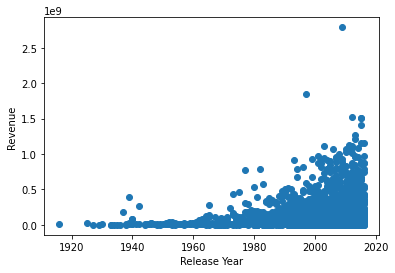

In [41]:
# Plot revenue against release year
x = release_year
y = movies['revenue']
plt.scatter(x, y)
plt.xlabel('Release Year')
plt.ylabel('Revenue')
plt.show()

### 'keywords'

The investigation of keywords will be quite light. We will create features for the number of characters and words in the original string for use in the models. There may be more value here to be unlocked but that deep dive is beyond the scope of this analysis.

In [42]:
# This summary shows the strings are quite idiosyncratic
movies['keywords'].value_counts()

independent film                                                       13
duringcreditsstinger                                                   10
sport                                                                   8
woman director                                                          8
independent film woman director                                         4
                                                                       ..
baseball world war ii sport baseball player female athlete              1
london england england 1970s spirit single mother                       1
hacker hacking creator frat party social network                        1
relationship ensemble cast duringcreditsstinger                         1
united states\u2013mexico barrier legs arms paper knife guitar case     1
Name: keywords, Length: 3203, dtype: int64

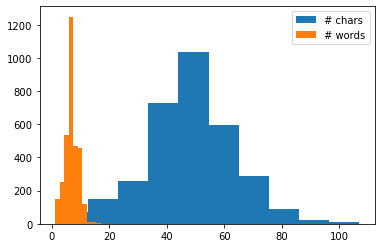

In [43]:
# Plot the distribution of 'keywords' length
plt.hist(movies['keywords'].str.len(), label = '# chars')
plt.hist(movies['keywords'].str.split().str.len(), label = '# words')
plt.legend(loc = 'upper right')
plt.show()

In [44]:
# Create a feature for the number of keywords, and replace NaN with 0
movies['num_keywords'] = movies['keywords'].str.split().str.len()
movies['num_keywords'].replace(np.nan, 0, inplace = True)

In [45]:
# Create a feature for the number of characters in keywords, and replace NaN with 0
movies['len_keywords'] = movies['keywords'].str.len()
movies['len_keywords'].replace(np.nan, 0, inplace = True)

### 'production_companies'

Below we parse 'production_companies' into a cleaned list and create a list of the distinct production companies in the dataset. We see that 'Warner Bros.' has producted the most movies (285), followed by Universal Pictures (276).

In [46]:
# Get a list of the production companies for each movie, each as a dictionary
comp_dict = [eval(str) for str in movies['production_companies']]

# Create the clean list of production companies for each movie
prod_cos = []
for i in range(movies.shape[0]):
    prod_cos.append([comp['name'] for comp in comp_dict[i]])

# Store the cleaned list of production companies
movies['prod_co'] = prod_cos

In [47]:
# create a series of the production companies
companies = pd.Series([co for comp_list in movies['prod_co'] for co in comp_list]).value_counts()
companies.head()

Warner Bros.                              285
Universal Pictures                        275
Paramount Pictures                        248
Twentieth Century Fox Film Corporation    205
Columbia Pictures                         168
dtype: int64

### 'production_countries'

Similar to above, we will create a cleaned list of production countries for each movie and then store a list of distinct production countries.

In [48]:
# Get a list of the production companies for each movie, each as a dictionary
country_dict = [eval(str) for str in movies['production_countries']]

# Create the clean list of production companies for each movie
prod_cntries = []
for i in range(movies.shape[0]):
    prod_cntries.append([cntry['name'] for cntry in country_dict[i]])

# Store the cleaned list of production companies
movies['prod_cntries'] = prod_cntries

In [49]:
countries = pd.Series([co for cntry_list in movies['prod_cntries'] for co in cntry_list]).value_counts()

In [50]:
print('The top production country is {} (~{}%)'.format(countries.index[0], 100*round(countries[0] / movies.shape[0], 3)))

The top production country is United States of America (~89.4%)


### 'spoken_languages'

In [51]:
# Get a list of the spoken languages for each movie, each as a dictionary
language_dict = [eval(str) for str in movies['spoken_languages']]

# Create the clean list of spoken languages for each movie
langs = []
for i in range(movies.shape[0]):
    langs.append([lng['iso_639_1'] for lng in language_dict[i]])

# Store the cleaned list of spoken languages
movies['languages'] = langs

In [52]:
# Create a feature for the number of languages spoken in each movies
movies['num_languages'] = movies['languages'].str.len()

### 'original_language'

As might be expected from the above finding on production country, we see that ~96% of the movies are in English. From this we can conclude that the source of this dataset biased heavily towards Hollywood productions.

In [53]:
movies['original_language'].value_counts(normalize = True).head()

en    0.958507
fr    0.008060
es    0.005373
zh    0.004179
ja    0.003881
Name: original_language, dtype: float64

In [54]:
# Create an indicator feature for English language movies
movies['orig_lang_english'] = (movies['original_language'] == 'en').astype(int)

### 'director'

In [55]:
movies['director'].value_counts().head(10)

Steven Spielberg     27
Clint Eastwood       20
Martin Scorsese      17
Robert Rodriguez     16
Ridley Scott         16
Renny Harlin         15
Tim Burton           14
Steven Soderbergh    14
Robert Zemeckis      13
Joel Schumacher      13
Name: director, dtype: int64

In [56]:
# Create an indicator for movies from a top director, defined as those in the top ten of revenue generation
top_directors = list(movies.groupby('director')['revenue'].sum().sort_values(ascending = False).index[0:10])
print(top_directors)

movies['top_director'] = (movies['director'].isin(top_directors)).astype(int)

['Steven Spielberg', 'Peter Jackson', 'James Cameron', 'Michael Bay', 'Christopher Nolan', 'Chris Columbus', 'Robert Zemeckis', 'George Lucas', 'Tim Burton', 'Ridley Scott']


### 'runtime'

In the below bins and scatter plot we note that:

1. There are very few very long (about 220+ minutes) or very short (approx. 70 minutes or fewer minutes), and the largest group of movies could be classified as roughly feature length.

2. The very long and very short movies tend to earn relatively little revenue.

3. The very highest earning movies are outside of the typical feature length, but for high earners (1bn+) there seems to be little pattern within the standard truntime range.

In [57]:
movies['runtime'].value_counts(bins = 8, sort = False)

(40.702000000000005, 78.125]      28
(78.125, 115.25]                2207
(115.25, 152.375]                980
(152.375, 189.5]                 110
(189.5, 226.625]                  21
(226.625, 263.75]                  3
(263.75, 300.875]                  0
(300.875, 338.0]                   1
Name: runtime, dtype: int64

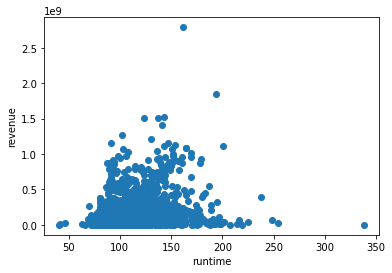

In [58]:
x = movies['runtime']
y = movies['revenue']

plt.scatter(x, y)
plt.xlabel('runtime')
plt.ylabel('revenue')
plt.show()

In [59]:
# Create an indicator for very long movies
movies['runtime_ov_220'] = (movies['runtime'] > 210).astype(int)

# Create an indicator for feature length movies
movies['runtime_bt_110_220'] = ((movies['runtime'] <= 210) & (movies['runtime'] > 110)).astype(int)

# Create an indicator for sub-feature length movies
movies['runtime_bt_80_110'] = ((movies['runtime'] <= 110) & (movies['runtime'] > 80)).astype(int)

# Create an indicator for short movies
movies['runtime_bl_80'] = (movies['runtime'] <= 80).astype(int)

### Standardize Features

In [60]:
# Drop a few more columns that won't be used
drop_cols2 = ['status', 'production_companies', 'production_countries', 'spoken_languages']
movies.drop(columns = drop_cols2, inplace = True)

In [81]:
# Create a list of features to normalize
numeric_feats = ['budget',
                 'popularity',
                 'runtime',
                 'vote_average',
                 'vote_count',
                 'num_keywords', 
                 'len_keywords', 
                 'num_languages'
                ]
std_feats = []
# Standardize the predictors
for ft in numeric_feats:
    new_ft = ft + '_std'
    std_feats.append(new_ft)
    movies[new_ft] = (movies[ft] - movies[ft].mean())/movies[ft].std()

In [82]:
# Create a list of the binary features
binary_feats = ['extreme_pop',
                'orig_lang_english',
                'top_director',
                'runtime_ov_220',
                'runtime_bt_110_220',
                'runtime_bt_80_110',
                'runtime_bl_80'
               ]

# Create a list of the features to use in the models
model_feats = std_feats + binary_feats

# Modeling

Now that we have completely the data clean up, exploration, and feature engineering, we will move on to the modeling task. We will perform two modeling tasks with two separate objectives related to prediction of movie revenue. The first is regression, using multilinear regression and RandomForest regression, with the goal of predicting revenue. The second task is classification, using a RandomForest classifier, based on the ratio of revenue to budget to see which movies earned more than their budget.

## Regression

First, we will set revenue as the target variable and then create the train and test data sets. Then we will build a linear regression model and the RandomForest model.

In [95]:
# Create the test and train sets for regression
target = 'revenue'
X_train, X_test, y_train, y_test = train_test_split(movies, movies[target], test_size = 0.25, random_state = 5)

### Linear Regression

We will perform forward step-wise selection, with feature elimination at each step, to find the optimal feature set for our model, based on r-squared. Then we will fit the model to the training data and evaluate performance on the test data. Finally, we will quickly evaluate the assumptions of linear regression with this model.

In [84]:
num_feats = len(model_feats)
p = []
best = 0.0

for i in range(num_feats):
    p_prime = []
    best_prime = 0.0
    
    for ft in model_feats:
        feat_list = [] + p
        feat_list.append(ft)
        feats = '+'.join(feat_list)
        
        # Train a new model on feats
        model = smf.ols(formula = 'revenue~' + feats, data = X_train).fit()
        
        # Identify any insignificant features
        drop_list = model.pvalues[model.pvalues >= 0.05]
        
        # Remove the insignificant features
        feat_list = [ft for ft in feat_list if ft not in drop_list]
        if len(feat_list) == 0:
            break
        
        # Retrain the model
        feats = '+'.join(feat_list)
        model = smf.ols(formula = 'revenue~' + feats, data = X_train).fit()
        
        if model.rsquared_adj > best_prime:
            p_prime = feat_list
            best_prime = model.rsquared_adj
            
    if best_prime > best:
        best = best_prime
        p = p_prime
    print('Best score is {} for features {}'.format(round(best, 3), p))

Best score is 0.568 for features ['vote_count_std']
Best score is 0.699 for features ['vote_count_std', 'budget_std']
Best score is 0.701 for features ['vote_count_std', 'budget_std', 'popularity_std']
Best score is 0.703 for features ['vote_count_std', 'budget_std', 'popularity_std', 'top_director']
Best score is 0.703 for features ['vote_count_std', 'budget_std', 'popularity_std', 'top_director']
Best score is 0.703 for features ['vote_count_std', 'budget_std', 'popularity_std', 'top_director']
Best score is 0.703 for features ['vote_count_std', 'budget_std', 'popularity_std', 'top_director']
Best score is 0.703 for features ['vote_count_std', 'budget_std', 'popularity_std', 'top_director']
Best score is 0.703 for features ['vote_count_std', 'budget_std', 'popularity_std', 'top_director']
Best score is 0.703 for features ['vote_count_std', 'budget_std', 'popularity_std', 'top_director']
Best score is 0.703 for features ['vote_count_std', 'budget_std', 'popularity_std', 'top_director'

In [85]:
# Create the feature set for the model based on the prior results
best_feats = '+'.join(p)

# Fit the model to the training data
ols_model = smf.ols(formula = 'revenue ~ ' + best_feats, data = X_train).fit()

# Print a summary of the model
ols_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                revenue   R-squared:                       0.704
Model:                            OLS   Adj. R-squared:                  0.703
Method:                 Least Squares   F-statistic:                     1487.
Date:                Sun, 25 Jun 2023   Prob (F-statistic):               0.00
Time:                        17:37:09   Log-Likelihood:                -49762.
No. Observations:                2512   AIC:                         9.953e+04
Df Residuals:                    2507   BIC:                         9.956e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       1.158e+08   1.98e+06     58.599      0.000    1.12e+08     1.2e+08
vote_count_std   8.47e+07   3.23e+06     26.197      0.000    7.84e+07     9.1e+07
budget_std      7.559e+07   2.33e+06     32.483      0.000     7.1e+07    8.02e+07
popularity_std  1.248e+07   2.77e+06      4.502      0.000    7.04e+06    1.79e+07
top_director    4.836e+07   1.11e+07      4.373      0.000    2.67e+07       7e+07
==============================================================================
Omnibus:                     1147.395   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            24288.113
Skew:                           1.655   Prob(JB):                         0.00
Kurtosis:                      17.869   Cond. No.                         8.36
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [86]:
# Get predictions on the test data
ols_pred = ols_model.predict(X_test)

# Calculate the test set TSS and the number of records, for r-squared
TSS_test = sum(np.power(y_test - y_test.mean(), 2))
test_len = len(y_test) - 1

# Compute the r-squared on the test data
adjr2_ols_test = 1 - (sum(np.power(ols_pred - y_test, 2))/TSS_test) * (test_len/(test_len - 1))
print('Adj. r-squared on test data:', round(adjr2_ols_test, 3))

Adj. r-squared on test data: 0.697


#### Check model assumptions

Overall the checks below suggest that a linear model might not be the right fit for these data:

1. The fitted vs. observed plot does not provide evidence that the linearity assumption has been violated.

2. The residuals vs fitted plot does indicate that the model performs poorly with large revenue predictions

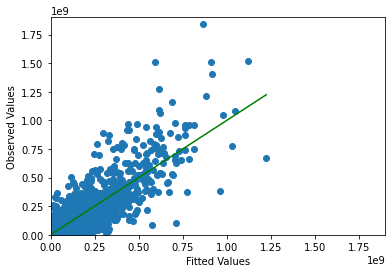

In [87]:
# Fitted vs observed values
x = ols_model.predict()
y = y_train
plt.scatter(x, y)
plt.xlabel('Fitted Values')
plt.ylabel('Observed Values')
plt.xlim(0, np.power(10, 9)*1.9)
plt.ylim(0, np.power(10, 9)*1.9)
plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)), color = 'green')
plt.show()

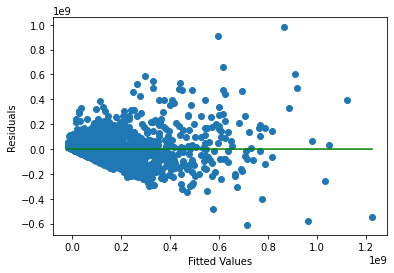

In [88]:
# Residuals vs fitted
x = ols_model.predict()
y = ols_model.resid
plt.scatter(x, y)
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)), color = 'green')
plt.show()

### RandomForest

We will perform a search for the hyperparameters used GridSearchCV and then fit a RandomForestRegressor to the training data using these parameters. We will then evaluate model performance on the test data, and finally view the feature importance in the model.

In [102]:
param_grid = [
    {'n_estimators': [100, 125, 150],
     'max_depth': [6, 8, 8, 12, 14, 16], 
     'min_samples_split': [2, 3, 4, 5], 
     'min_samples_leaf': [1, 2, 3, 4], 
     'max_features': ['sqrt']}
]

In [103]:
clf = GridSearchCV(RandomForestRegressor(), param_grid)
clf.fit(X_train[model_feats], y_train)

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid=[{'max_depth': [6, 8, 8, 12, 14, 16],
                          'max_features': ['sqrt'],
                          'min_samples_leaf': [1, 2, 3, 4],
                          'min_samples_split': [2, 3, 4, 5],
                          'n_estimators': [100, 125, 150]}])

In [104]:
best_params = clf.best_params_
best_params

{'max_depth': 12,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 125}

In [105]:
# Create a RandomForest Classifier based on the GridSearch results
reg = RandomForestRegressor(random_state = 0, max_features = 'sqrt', 
                            max_depth = best_params['max_depth'], 
                            min_samples_leaf = best_params['min_samples_leaf'], 
                            min_samples_split = best_params['min_samples_split'])

# Train the classifier
rf_model = reg.fit(X_train[model_feats], y_train)


# Store predictions on train data
train_pred = rf_model.predict(X_train[model_feats])

# Store predictions on test data
test_pred = rf_model.predict(X_test[model_feats])

In [106]:
# Evaluate performance on test data
print('Explained Variance Score: ', round(metrics.explained_variance_score(y_test, test_pred), 3))
print('Mean Absolute Error: ', round(metrics.mean_absolute_error(y_test, test_pred), 3))
print('Mean Squared Error: ', round(metrics.mean_squared_error(y_test, test_pred), 3))
print('R-squared: ', round(metrics.r2_score(y_test, test_pred), 3))

Explained Variance Score:  0.713
Mean Absolute Error:  54998701.008
Mean Squared Error:  1.1448722759030398e+16
R-squared:  0.713


It is interesting to note that in the feature importance chart below, we see the top three features align between the linear model and the RandomForest model. The fourth feature for the linear model, top_director, is beaten out here by runtime and avote_average.

Text(0.5, 0, 'Mean decrease in impurity')

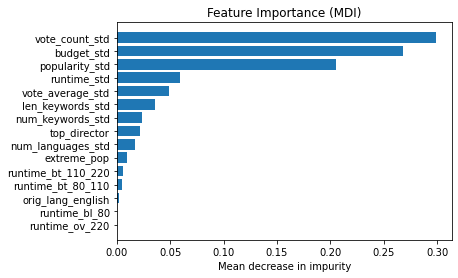

In [101]:
# obtain feature importance
feature_importance = reg.feature_importances_

# sort features according to importance
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0])

# plot feature importances
plt.barh(pos, feature_importance[sorted_idx], align="center")

plt.yticks(pos, np.array(model_feats)[sorted_idx])
plt.title("Feature Importance (MDI)")
plt.xlabel("Mean decrease in impurity")

### Conclusion

In our regression task we created a linear model and a RandomForest model to predict movie revenue, and based on r-squared saw slightly better performance with the RandomForest. Additionally, we see similiarity in feature importance/significance. However, in evaluating the assumptions for the linear model we found evidence of violation. As a result, the RandomForest is the perferred model.

## Classification

For our classification task, we will classify movies based on whether or not it earned more money in revenue than was allocated in the budget. We will define this feature in terms of the revenue:budget featue created previously.

In [107]:
# Create an indicator for when the movies revenue exceeds its budget
movies['ex_rev'] = movies['revenue:budget'] > 1.0
movies['ex_rev'] = movies['ex_rev'].astype(int)

In [108]:
target = 'ex_rev'
X_train, X_test, y_train, y_test = train_test_split(movies, movies[target], test_size = 0.25, random_state = 5)

### RandomForest

As done before, we will perform a search for the hyperparameters used GridSearchCV and then fit a RandomForestClassified to the training data using these parameters. We will then evaluate model performance on the test data, and finally view the feature importance in the model.

In [116]:
param_grid = [
    {'n_estimators': [10, 15, 20],
     'max_depth': [4, 6, 8, 10, 12, 14], 
     'min_samples_split': [2, 3, 4, 5, 6], 
     'min_samples_leaf': [1, 2, 3, 4, 5], 
     'max_features': ['sqrt']}
]

In [117]:
clf = GridSearchCV(RandomForestClassifier(), param_grid)
clf.fit(X_train[model_feats], y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid=[{'max_depth': [4, 6, 8, 10, 12, 14],
                          'max_features': ['sqrt'],
                          'min_samples_leaf': [1, 2, 3, 4, 5],
                          'min_samples_split': [2, 3, 4, 5, 6],
                          'n_estimators': [10, 15, 20]}])

In [118]:
best_params = clf.best_params_
best_params

{'max_depth': 14,
 'max_features': 'sqrt',
 'min_samples_leaf': 5,
 'min_samples_split': 2,
 'n_estimators': 20}

In [119]:
# Create a RandomForest Classifier based on the GridSearch results
reg = RandomForestClassifier(random_state = 0, max_features = 'sqrt', 
                             max_depth = best_params['max_depth'], 
                             min_samples_leaf = best_params['min_samples_leaf'], 
                             min_samples_split = best_params['min_samples_split'],
                             n_estimators = best_params['n_estimators']
                            )

# Train the classifier
rf_model = reg.fit(X_train[model_feats], y_train)

# Store predictions on train data
train_pred = rf_model.predict(X_train[model_feats])

# Store predictions on test data
test_pred = rf_model.predict(X_test[model_feats])

In [120]:
# Model results on training data
print('Confussion Matrix:\n', metrics.confusion_matrix(y_train, train_pred))
print('\nClasification Report:\n', metrics.classification_report(y_train, train_pred, digits = 3))

Confussion Matrix:
 [[ 397  268]
 [  42 1805]]

Clasification Report:
               precision    recall  f1-score   support

           0      0.904     0.597     0.719       665
           1      0.871     0.977     0.921      1847

    accuracy                          0.877      2512
   macro avg      0.888     0.787     0.820      2512
weighted avg      0.880     0.877     0.868      2512



In [121]:
# Model results on test data
print('Confussion Matrix:\n', metrics.confusion_matrix(y_test, test_pred))
print('\nClasification Report:\n', metrics.classification_report(y_test, test_pred, digits = 3))

Confussion Matrix:
 [[114 139]
 [ 32 553]]

Clasification Report:
               precision    recall  f1-score   support

           0      0.781     0.451     0.571       253
           1      0.799     0.945     0.866       585

    accuracy                          0.796       838
   macro avg      0.790     0.698     0.719       838
weighted avg      0.794     0.796     0.777       838



Text(0.5, 0, 'Mean decrease in impurity')

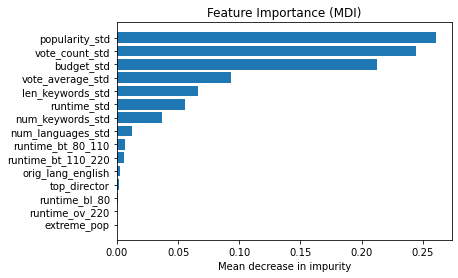

In [122]:
# Plot feature importance based on mean decrease in impurity

# obtain feature importance
feature_importance = reg.feature_importances_

# sort features according to importance
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0])

# plot feature importances
plt.barh(pos, feature_importance[sorted_idx], align="center")

plt.yticks(pos, np.array(model_feats)[sorted_idx])
plt.title("Feature Importance (MDI)")
plt.xlabel("Mean decrease in impurity")

### Logistic Regression

As with the RandomForest model, we will perform a gridsearch for the optimal hyperparameters, and then fit a model and evaulate the results. In addition to the confusion matrix and classification scores, for this logistic model we will also plot the ROC curve and calculate the AUC.

In [123]:
param_grid = [
    {'C': list(np.logspace(-3,3,7)),
     'penalty': ['elasticnet', 'l1', 'l2', 'none'],
     'solver': ['lbfgs', 'liblinear', 'newton-cg']
    }
]

grid_search = GridSearchCV(LogisticRegression(max_iter = 1000, random_state = 0), param_grid, cv = 10)

grid_search.fit(X_train[model_feats], y_train)

C:\Users\bhaff\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\bhaff\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\bhaff\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\bhaff\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\bhaff\anaconda3\lib\site-packages\sklearn\model_sele

GridSearchCV(cv=10, estimator=LogisticRegression(max_iter=1000, random_state=0),
             param_grid=[{'C': [0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0],
                          'penalty': ['elasticnet', 'l1', 'l2', 'none'],
                          'solver': ['lbfgs', 'liblinear', 'newton-cg']}])

In [124]:
best_params = grid_search.best_params_
best_params

{'C': 10.0, 'penalty': 'l1', 'solver': 'liblinear'}

In [125]:
LogReg = LogisticRegression(solver = 'newton-cg', penalty = 'l2', C = 100).fit(X_train[model_feats], y_train)

# Store predictions on train data
train_pred = LogReg.predict(X_train[model_feats])

# Store predictions on test data
test_pred = LogReg.predict(X_test[model_feats])

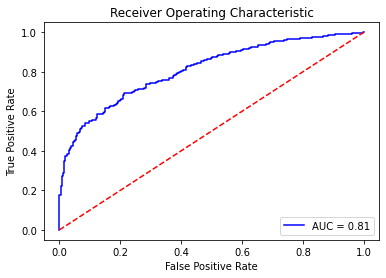

In [126]:
score = metrics.roc_auc_score(y_test, LogReg.predict_proba(X_test[model_feats])[:, 1])
fpr, tpr, threshold = metrics.roc_curve(y_test, LogReg.predict_proba(X_test[model_feats])[:,1])
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % score)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


In [127]:
# Model results on training data
print('Confussion Matrix:\n', metrics.confusion_matrix(y_train, train_pred))
print('\nClasification Report:\n', metrics.classification_report(y_train, train_pred, digits = 3))

Confussion Matrix:
 [[ 230  435]
 [ 130 1717]]

Clasification Report:
               precision    recall  f1-score   support

           0      0.639     0.346     0.449       665
           1      0.798     0.930     0.859      1847

    accuracy                          0.775      2512
   macro avg      0.718     0.638     0.654      2512
weighted avg      0.756     0.775     0.750      2512



In [128]:
# Model results on test data
print('Confussion Matrix:\n', metrics.confusion_matrix(y_test, test_pred))
print('\nClasification Report:\n', metrics.classification_report(y_test, test_pred, digits = 3))

Confussion Matrix:
 [[ 77 176]
 [ 28 557]]

Clasification Report:
               precision    recall  f1-score   support

           0      0.733     0.304     0.430       253
           1      0.760     0.952     0.845       585

    accuracy                          0.757       838
   macro avg      0.747     0.628     0.638       838
weighted avg      0.752     0.757     0.720       838



### Conclusion

Here we see better performance on the test data from the RandomForestClassifier in all measures. Both models performed reasonably well in this binary classification task.

# Conclusion


### Summary
In this report we analyzed a movie dataset (4,803 records with 24 features) and built (supervised) machine learning models to predict revenue based on film characteristics, performing both regression (how much was earned) and classification (did earnings exceed the budget) tasks. The models performed relatively well in prediction, with RandomForest models out-performing linear and logistic regression models in the same task. 

### Shortcomings
The first shortcoming in this analysis has to do with the quantity and quality of data. The initial dataset contained 4.8K movies and biased heavily towards recent (mid-1990s forward) Hollywood movies, making the data much less representative than initially believed. Further, we dropped 1,453 of these records (30%) due to data issues, most notably lacking revenue (1,387 records), which greatly reduced the available data for training and testing the models.


### Potential Improvements
Out of the 24 features available in the dataset, only 8 were used in the models. There is likely more that can be done to extract value from the information in the unused features, such as genres and cast, and in some of those used (e.g., keywords). While we are unlikely to uncover any feature or combination of features that could predict the success of 'Paranormal Activity' or 'Iron Man' with more time there are certainly predictive features in the data.